# Proyecto Final
- Luis Pablo López Iracheta
- Diego Mares Rodríguez
- Francisco Marín Castillo

Métodos a utilizar: Algoritmo Genético y Recosido simulado

In [1]:
# Librerias a utilizar
import numpy as np
import matplotlib.pyplot as plt
import time

Función de Michalewicz para d=5 dimensiones
- x: vector de 5 dimensiones en [0, π]
- m: parámetro de pendiente (default=10)

In [ ]:
# Función de Michalewicz
def michalewicz(x, m=10):
    d = len(x)
    suma = 0
    for i in range(d):
        suma += np.sin(x[i]) * (np.sin(((i+1) * x[i]**2) / np.pi))**(2*m)
    return -suma

## 1er métodod: Algoritmo Genético

**Algoritmo Genético para optimización.**

*Parámetros:*
- funcion_objetivo: función a Minimizar.
- dim: dimensionalidad del problema.
- tam_poblacion: número de individuos en la población.
- generaciones: número de iteraciones.
- tasa_cruce: probabilidad de que ocurra cruce entre padres.
- tasa_mutacion: probabilidad de que un individuo mute.
- tam_elite: número de mejores individuos que pasan intactos a la siguiente generación.
- limites: tupla (min, max) del espacio de búsqueda.

*Retorna:*
- mejor_solucion: el mejor individuo encontrado.
- mejor_aptitud: el valor de la función objetivo para el mejor individuo.
- historial: lista con el mejor valor encontrado en cada generación.

In [3]:
# ==========================================
# ALGORITMO GENÉTICO (GA)


def algoritmo_genetico(
    funcion_objetivo,
    dim=5,
    tam_poblacion=None,
    generaciones=None,
    tasa_cruce=0.5,
    tasa_mutacion=0.5,
    tam_elite=2,
    limites=(0, np.pi)
):
  
    
    lim_inf, lim_sup = limites
    historial = []
    
    # Inicializar población
    poblacion = np.random.uniform(lim_inf, lim_sup, (tam_poblacion, dim)) # poblacion aleatoria de numeros entre 0 y pi
    
    for gen in range(generaciones):

        # Evaluar aptitud (fitness) de toda la población
        aptitudes = []
        for individuo in poblacion:
            aptitud = funcion_objetivo(individuo)
            aptitudes.append(aptitud)
        aptitudes = np.array(aptitudes)
        
        # Guardar la mejor aptitud de esta generación
        idx_mejor = np.argmin(aptitudes)
        historial.append(aptitudes[idx_mejor])
        
        # Ordenar población por aptitud (menor es mejor en minimización)
        indices_ordenados = np.argsort(aptitudes)
        poblacion = poblacion[indices_ordenados]
        aptitudes = aptitudes[indices_ordenados]
        
        # Elitismo
        nueva_poblacion = []
        for i in range(tam_elite):
            nueva_poblacion.append(poblacion[i].copy())
        
        # Generar el resto de la nueva población
        while len(nueva_poblacion) < tam_poblacion:
            # Selección por torneo
            padre1 = seleccion_torneo(poblacion, aptitudes, k=3)
            padre2 = seleccion_torneo(poblacion, aptitudes, k=3)
            
            # Cruza para solo los que pasen la tasa de cruce
            if np.random.rand() < tasa_cruce:  
                hijo1, hijo2 = cruce(padre1, padre2)
            else:
                hijo1, hijo2 = padre1.copy(), padre2.copy()
            
            # Mutación
            hijo1 = mutacion(hijo1, tasa_mutacion, limites)
            hijo2 = mutacion(hijo2, tasa_mutacion, limites)
            
            
            if len(nueva_poblacion) < tam_poblacion + 1:
                nueva_poblacion.append(hijo1)
                nueva_poblacion.append(hijo2)
        
        # Se actualiza la población y se recorta al tamaño original
        poblacion = np.array(nueva_poblacion[:tam_poblacion])
    
    # Evaluación final para retornar el mejor resultado absoluto
    aptitudes = []
    for i in poblacion:
        aptitud = funcion_objetivo(i)
        aptitudes.append(aptitud)

    aptitudes = np.array(aptitudes)
    idx_mejor = np.argmin(aptitudes)
    
    return poblacion[idx_mejor], aptitudes[idx_mejor], historial

def seleccion_torneo(poblacion, aptitudes, k=3):
    # Selección por torneo
    indices = np.random.choice(len(poblacion), k, replace=False) 
    aptitudes_torneo = aptitudes[indices]
    
    # Calor minio es el ganador
    idx_ganador = indices[np.argmin(aptitudes_torneo)]
    return poblacion[idx_ganador].copy()

def cruce(padre1, padre2, alpha=0.5):
    # Definimos quienes son los padres
    d = len(padre1)
    hijo1 = np.zeros(d)
    hijo2 = np.zeros(d)
    
    for i in range(d):
        val_min = min(padre1[i], padre2[i])
        val_max = max(padre1[i], padre2[i])
        rango = val_max - val_min
        
        lim_inf_cruce = val_min - alpha * rango
        lim_sup_cruce = val_max + alpha * rango
        
        hijo1[i] = np.random.uniform(lim_inf_cruce, lim_sup_cruce)
        hijo2[i] = np.random.uniform(lim_inf_cruce, lim_sup_cruce)
    
    return hijo1, hijo2

def mutacion(individuo, tasa_mutacion, limites):
    """Mutación gaussiana."""
    lim_inf, lim_sup = limites
    mutado = individuo.copy()
    
    for i in range(len(individuo)):
        if np.random.rand() < tasa_mutacion:
            # Mutación gaussiana con sigma = 10% del rango total
            sigma = 0.1 * (lim_sup - lim_inf)
            mutado[i] += np.random.normal(0, sigma)
            # Mantener dentro de los límites
            mutado[i] = np.clip(mutado[i], lim_inf, lim_sup)
    
    return mutado

In [4]:

print("ALGORITMO GENÉTICO - Función de Michalewicz (d=5)")

# Parámetros
DIMENSIONES = 5
TAM_POBLACION = 50
GENERACIONES = 100

mejor_sol, mejor_aptitud, historial = algoritmo_genetico(
    funcion_objetivo=michalewicz,
    dim=DIMENSIONES,
    tam_poblacion=TAM_POBLACION,
    generaciones=GENERACIONES
)

print(f"\nMejor solución encontrada:")
print(f"x = {mejor_sol}")
print(f"f(x) = {mejor_aptitud:.6f}")


ALGORITMO GENÉTICO - Función de Michalewicz (d=5)

Mejor solución encontrada:
x = [2.16889543 1.5697424  1.30916388 1.1316896  0.99340578]
f(x) = -4.419005


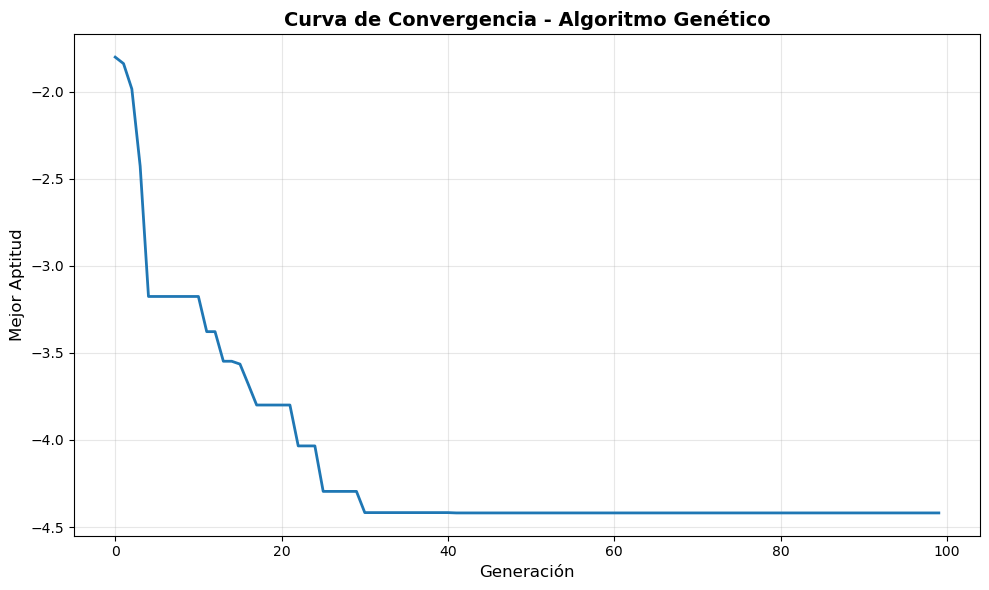

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(historial, linewidth=2)
plt.xlabel('Generación', fontsize=12)
plt.ylabel('Mejor Aptitud', fontsize=12)
plt.title('Curva de Convergencia - Algoritmo Genético', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# **Ventajas:**
1. Algoritmo Genético (AG)
- Buena exploración global del espacio de búsqueda
- La población diversa y el cruce permiten cubrir muchas regiones diferentes.

Esto es útil para Michalewicz, que tiene múltiples mínimos locales.

2. Menos propenso a quedarse atrapado en mínimos locales
- Gracias a la diversidad de individuos y a la mutación.
- Robusto a ruidos y paisajes complejos

3. Funciona razonablemente bien aunque la superficie sea irregular (como es el caso).
- Paralelizable naturalmente
- Evaluar a los individuos se puede hacer en paralelo → útil para problemas grandes.

# **Desventajas**
1. Convergencia lenta
- Explora bien, pero a veces tarda mucho en refinar soluciones cercanas al óptimo global.

2. Muchos parámetros que ajustar
- Población, cruce, mutación, élite, etc.
- Si no se parametriza bien, pierde rendimiento.

3. Puede perder diversidad
Si ocurre, se estanca en una región sin mejorar.

4. A veces da soluciones “buenas, pero no excelentes”
- Justo en funciones difíciles como Michalewicz, se acerca pero no llega tan abajo como SA.

## 2do método: Recosido simulado
*Parámetros:*
- dim: dimensionalidad del problema.
- temp_inicial: temperatura inicial del sistema.
- temp_final: temperatura mínima para detener el algoritmo.
- alfa: factor de enfriamiento geométrico (0 < alfa < 1).
- max_iter: número máximo total de evaluaciones/iteraciones.
- vecinos_por_temp: intentos de vecinos antes de enfriar (cadena de Markov).
- tam_paso: desviación estándar para generar vecinos (perturbación).
- limites: tupla (min, max) del espacio de búsqueda.
- semilla: semilla aleatoria.

*Retorna:*
- mejor_solucion: la mejor solución encontrada en todo el proceso.
- mejor_aptitud: el valor de la función para la mejor solución.
- historial: lista de la mejor aptitud en cada iteración.

In [6]:

# RECOCIDO SIMULADO (SA)

def recocido_simulado(
    funcion_objetivo,
    dim=5,
    temp_inicial=100.0,
    temp_final=0.001,
    alfa=0.95,
    max_iter=500,
    vecinos_por_temp=50,
    tam_paso=0.5,
    limites=(0, np.pi),
    solucion_inicial=None
):
    
    lim_inf, lim_sup = limites
    historial = []
    
    # Solución inicial aleatoria
    if solucion_inicial is None:
        solucion_actual = np.random.uniform(lim_inf, lim_sup, dim)
        print("Solucion inicial aleatoria:")
    else:
        solucion_actual = np.array(solucion_inicial).copy()

    aptitud_actual = funcion_objetivo(solucion_actual)
    print(f"Solución inicial: {solucion_actual}")
    print(f"Aptitud inicial: {aptitud_actual:.6f}")

    
    # Inicializar la mejor solución global
    mejor_solucion = solucion_actual.copy()
    mejor_aptitud = aptitud_actual
    
    temperatura = temp_inicial
    iteracion = 0
    
    # Bucle principal: mientras la temperatura sea alta y no excedamos iteraciones
    while temperatura > temp_final and iteracion < max_iter:
        
        # Explorar vecinos a esta temperatura
        for i in range(vecinos_por_temp):

            # Temperatura alta = pasos grandes (exploración)
            # Temperatura baja = pasos pequeños (explotación)
            paso_actual = tam_paso * (temperatura / temp_inicial)
    
            # Generar vecino
            vecino = generar_vecino(solucion_actual, paso_actual, limites)
            
            if temperatura < 1:  
                # Modo refinamiento fino
                paso_fino = tam_paso / 10
                vecino = solucion_actual + np.random.normal(0, paso_fino, dim)
            else:
                # Modo normal / exploración
                vecino = solucion_actual + np.random.normal(0, tam_paso, dim)

            vecino = np.clip(vecino, lim_inf, lim_sup)

            # Pasoso muy pequeños
            if np.allclose(vecino, solucion_actual, atol=1e-5):
                vecino = solucion_actual + np.random.normal(0, tam_paso * 2, dim)
                vecino = np.clip(vecino, lim_inf, lim_sup)


            aptitud_vecino = funcion_objetivo(vecino)
            
            # Calcular diferencia de energía 
            delta_e = aptitud_vecino - aptitud_actual
            
            # Criterio de aceptación (Metropolis)
            if delta_e < 0:
                # Si el vecino es mejor, aceptamos siempre
                solucion_actual = vecino
                aptitud_actual = aptitud_vecino
            else:
                # Si es peor, aceptamos con probabilidad basada en Boltzmann
                prob_aceptacion = np.exp(-delta_e / temperatura)
                if np.random.rand() < prob_aceptacion:
                    solucion_actual = vecino
                    aptitud_actual = aptitud_vecino
            
            # Actualizar mejor solución global histórica
            if aptitud_actual < mejor_aptitud:
                mejor_solucion = solucion_actual.copy()
                mejor_aptitud = aptitud_actual
            
            historial.append(mejor_aptitud)
            iteracion += 1
            
            # Detenemos en caso de alcanzar el máximo de iteraciones
            if iteracion >= max_iter:
                break
        
        # Enfriar temperatura
        temperatura *= alfa
    
    return mejor_solucion, mejor_aptitud, historial

def generar_vecino(solucion, tam_paso, limites):
    """
    Genera un vecino mediante perturbación gaussiana.
    Modifica algunas dimensiones de la solución actual.
    """
    lim_inf, lim_sup = limites
    vecino = solucion.copy()
    
    # Perturbar cada dimensión con cierta probabilidad
    for i in range(len(solucion)):
        if np.random.rand() < 0.3:  # 30% probabilidad de cambio por dimensión
            vecino[i] += np.random.normal(0, tam_paso)
            # Mantener dentro de los límites (clipping)
            vecino[i] = np.clip(vecino[i], lim_inf, lim_sup)
    
    
    
    return vecino

    

Solucion inicial aleatoria:
Solución inicial: [1.34474238 0.6925997  1.34796253 0.3487031  2.77248312]
Aptitud inicial: -0.743607

Mejor solución encontrada:
x = [2.14173912 1.56449674 2.69379113 1.16869288 1.03115089]
f(x) = -3.174989


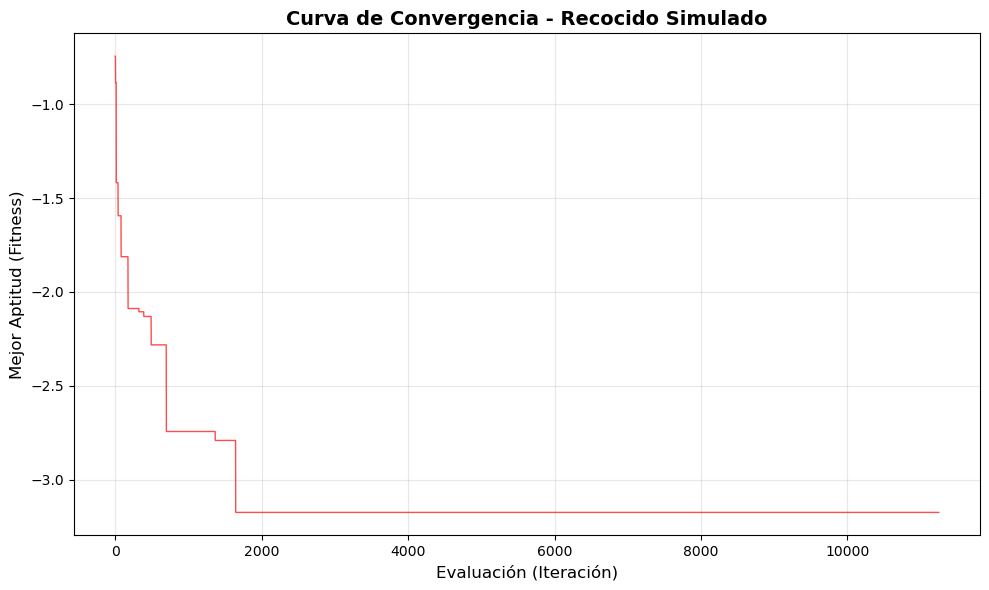

In [7]:
# Parámetros
DIMENSIONES = 5
TEMP_INICIAL = 100.0
TEMP_FINAL = 0.001
ALFA = 0.95
MAX_ITER = 25000  
VECINOS_POR_TEMP = 50

# Ejecutar SA
mejor_sol, mejor_fit, historial = recocido_simulado(
    funcion_objetivo=michalewicz,
    dim=DIMENSIONES,
    temp_inicial=TEMP_INICIAL,
    temp_final=TEMP_FINAL,
    alfa=ALFA,
    max_iter=MAX_ITER,
    vecinos_por_temp=VECINOS_POR_TEMP,
    tam_paso=0.5
)

print(f"\nMejor solución encontrada:")
print(f"x = {mejor_sol}")
print(f"f(x) = {mejor_fit:.6f}")

# Gráfica de convergencia
plt.figure(figsize=(10, 6))
plt.plot(historial, linewidth=1, alpha=0.7, color='red') # Color rojo para diferenciar del GA
plt.xlabel('Evaluación (Iteración)', fontsize=12)
plt.ylabel('Mejor Aptitud (Fitness)', fontsize=12)
plt.title('Curva de Convergencia - Recocido Simulado', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# **Ventajas:**
Recocido Simulado
1. Muy buen refinamiento local (explotación)
- Una vez cerca de un mínimo profundo, SA baja muy bien.

2. Puede escapar de mínimos locales
- La probabilidad de aceptar soluciones malas al inicio le da buena movilidad.

3. Simple de implementar y con pocos parámetros
- Temperatura inicial, enfriamiento y tamaño del vecindario.

4. Rendimiento fuerte si se inicia en una buena región
- Si la solución inicial está cerca del óptimo, SA lo encuentra casi siempre.

# **Desventajas:**
Recocido Simulado
1. Exploración global limitada
- Si empieza en mala zona, SA se “pasea” alrededor y no encuentra regiones prometedoras.

2. Sensibilidad a parámetros
- Un enfriamiento muy rápido = se estanca.
- Uno muy lento = tarda demasiado.

3. Secuencial (no poblacional)
- El algoritmo solo trabaja sobre una solución → alta dependencia de la condición inicial.

4. En funciones como Michalewicz, puede caer en mínimos locales muy pronto
- Especialmente si el vecindario es pequeño.

## Algoritmos hibrido
Estrategia:
1. GA explora el espacio de búsqueda (exploración global).
2. SA refina la mejor solución encontrada por el GA (explotación local).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time


# ALGORITMO HÍBRIDO GA → SA

def hibrido_ga_sa(
    funcion_objetivo,
    dim=5,
    # Parámetros GA
    tam_poblacion=10,
    generaciones=20,
    tasa_cruce=0.8,
    tasa_mutacion=0.1,
    tam_elite=2,
    # Parámetros SA
    temp_inicial=100000,
    temp_final=0.0001,
    alfa=0.5,
    max_iter_sa=25000,
    vecinos_por_temp=1000,
    tam_paso=0.7,
    # General
    limites=(0, np.pi)
):
   

    print("ALGORITMO HÍBRIDO: GA -> SA")

    
    inicio_tiempo = time.time()
    
    # ============ FASE 1: ALGORITMO GENÉTICO (EXPLORACIÓN) ============
    print("\nFASE 1 Algoritmo Genético (Exploración)...")
    solucion_ga, fit_ga, historial_ga = algoritmo_genetico(
        funcion_objetivo=funcion_objetivo,
        dim=dim,
        tam_poblacion=tam_poblacion,
        generaciones=generaciones,
        tasa_cruce=tasa_cruce,
        tasa_mutacion=tasa_mutacion,
        tam_elite=tam_elite,
        limites=limites
    )
    
    tiempo_ga = time.time() - inicio_tiempo
    print(f"    GA completado en {tiempo_ga:.2f}s")
    print(f"    Mejor solución GA: f(x) = {fit_ga:.6f}")
    
    # ============ FASE 2: RECOCIDO SIMULADO (EXPLOTACIÓN) ============
    print("\n FASE 2 Recocido Simulado (Refinamiento)...")
    print(f"   Iniciando desde la mejor solución del GA...")
    
    inicio_sa = time.time()
    solucion_sa, fit_sa, historial_sa = recocido_simulado(
        funcion_objetivo=funcion_objetivo,
        dim=dim,
        temp_inicial=temp_inicial,
        temp_final=temp_final,
        alfa=alfa,
        max_iter=max_iter_sa,
        vecinos_por_temp=vecinos_por_temp,
        tam_paso=tam_paso,
        limites=limites,
        solucion_inicial=solucion_ga
    )
    
    tiempo_sa = time.time() - inicio_sa
    tiempo_total = time.time() - inicio_tiempo
    
    print(f"    SA completado en {tiempo_sa:.2f}s")
    print(f"    Mejor solución SA: f(x) = {fit_sa:.6f}")
    
    # ============ RESULTADOS FINALES ============
    mejora = ((fit_ga - fit_sa) / abs(fit_ga)) * 100
    
 
    print("Resultados Finales")
   
    print(f"Solución inicial (GA):  f(x) = {fit_ga:.6f}")
    print(f"Solución final (SA):    f(x) = {fit_sa:.6f}")
    print(f"Mejora obtenida:        {mejora:.2f}%")
    print(f"Tiempo total:           {tiempo_total:.2f}s")
    
    return {
        'mejor_solucion': solucion_sa,
        'mejor_aptitud': fit_sa,
        'historial_ga': historial_ga,
        'historial_sa': historial_sa,
        'solucion_ga': solucion_ga,
        'aptitud_ga': fit_ga,
        'tiempo_total': tiempo_total
    }

ALGORITMO HÍBRIDO: GA -> SA

[FASE 1] Ejecutando Algoritmo Genético (Exploración)...
    GA completado en 0.01s
    Mejor solución GA: f(x) = -2.657195

[FASE 2] Ejecutando Recocido Simulado (Refinamiento)...
   Iniciando desde la mejor solución del GA...
Solución inicial: [2.18956845 0.20076802 1.2587333  1.9237898  0.27881185]
Aptitud inicial: -2.657195
    SA completado en 2.98s
    Mejor solución SA: f(x) = -3.983816
Resultados Finales
Solución inicial (GA):  f(x) = -2.657195
Solución final (SA):    f(x) = -3.983816
Mejora obtenida:        49.93%
Tiempo total:           2.99s


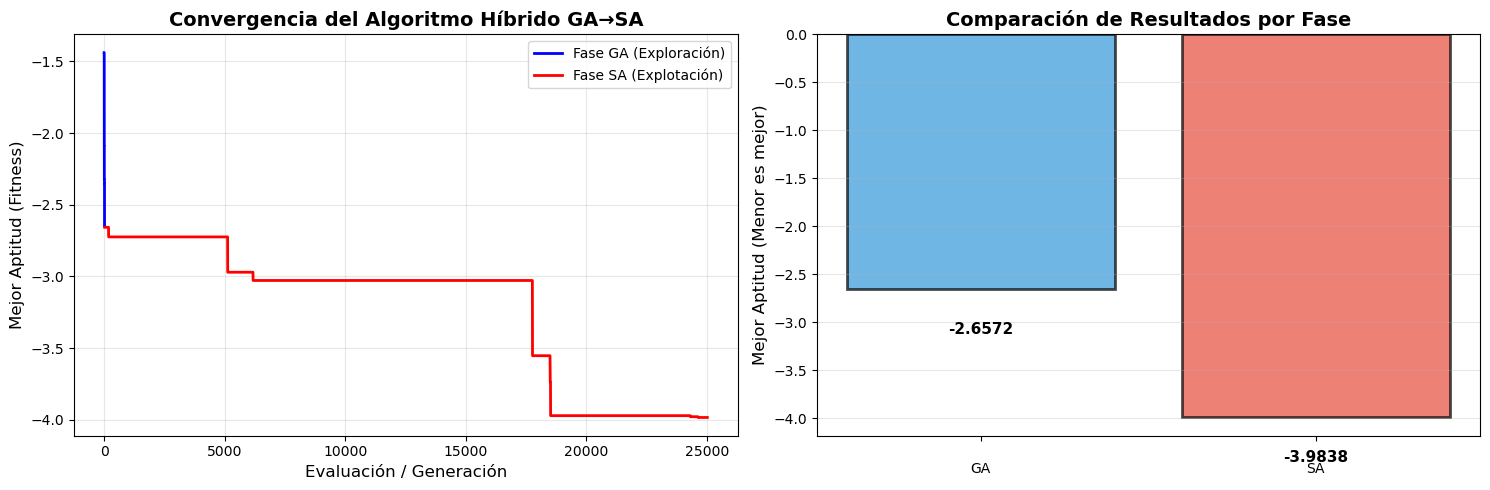


 Mejor solución final encontrada:
   x = [2.18117186 1.56923396 2.22972137 1.92926937 2.62124209]


In [9]:
# Parámetros
DIMENSIONES = 5

# Ejecutar híbrido
resultados = hibrido_ga_sa(
    funcion_objetivo=michalewicz,
    dim=DIMENSIONES
)

# Visualización
fig, ejes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfica 1: Convergencia completa
ax1 = ejes[0]
len_ga = len(resultados['historial_ga'])
x_ga = np.arange(len_ga)
x_sa = np.arange(len_ga, len_ga + len(resultados['historial_sa']))

ax1.plot(x_ga, resultados['historial_ga'], 'b-', linewidth=2, label='Fase GA (Exploración)')
ax1.plot(x_sa, resultados['historial_sa'], 'r-', linewidth=2, label='Fase SA (Explotación)')
ax1.set_xlabel('Evaluación / Generación', fontsize=12)
ax1.set_ylabel('Mejor Aptitud (Fitness)', fontsize=12)
ax1.set_title('Convergencia del Algoritmo Híbrido GA→SA', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfica 2: Comparación de fases
ax2 = ejes[1]
fases = ['\nGA', '\nSA']
valores_aptitud = [resultados['aptitud_ga'], resultados['mejor_aptitud']]
colores = ['#3498db', '#e74c3c']

barras = ax2.bar(fases, valores_aptitud, color=colores, alpha=0.7, edgecolor='black', linewidth=2)
ax2.set_ylabel('Mejor Aptitud (Menor es mejor)', fontsize=12)
ax2.set_title('Comparación de Resultados por Fase', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

# Añadir valores sobre las barras
for barra, valor in zip(barras, valores_aptitud):
    altura = barra.get_height()
    # Ajuste de posición del texto si el valor es negativo
    pos_y = altura if altura > 0 else altura - 0.5
    ax2.text(barra.get_x() + barra.get_width()/2., pos_y,
                f'{valor:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n Mejor solución final encontrada:")
print(f"   x = {resultados['mejor_solucion']}")

## **VENTAJAS DEL HÍBRIDO GA -> SA**

1. SA comienza desde una solución mejor gracias al GA
- Aunque el GA es pequeño, encuentra una región menos aleatoria que un inicio al azar.
- Esto ayuda a que el SA no empiece en una zona mala, lo que es crítico en Michalewicz por su alta multimodalidad.

2. Obtiene soluciones finales mejores que GA solo
- Debido a que SA explota muy bien el valle local, logra valores más bajos que los que el GA alcanza por sí mismo.

3. Más estabilidad en las corridas (menor desviación estándar)
- El GA estabiliza el punto inicial.
- El SA, al ser muy largo, suaviza la variabilidad entre corridas.

4. Evita que SA dependa totalmente del punto inicial
- SA puro es muy sensible a dónde empieza.
- El híbrido reduce esa dependencia → mayor robustez.

5. Mayor capacidad de escapar de mínimos locales superficiales
- GA puede localizar regiones prometedoras.
- SA profundiza dentro de esas regiones.
- Funciona bien en funciones multimodales como Michalewicz.

## **DESVENTAJAS DEL HÍBRIDO GA -> SA** 
1. El costo computacional es mucho mayor
- Debido a que el SA tiene muchísimas iteraciones y vecinos, es la parte más cara.
- Correr GA + SA consecutivamente es significativamente más lento.

2. El rendimiento depende mucho del SA (el híbrido es SA-dominante)
- GA pequeño aporta menos exploración global.
- El híbrido se comporta más como un SA potente con buena inicialización que como un balance real GA–SA.
- Por tanto, las mejoras vienen principalmente del SA, no tanto del GA.

3. Si el GA encuentra una solución inicial mala, SA podrá tardar en corregirlo
- Aunque SA es fuerte, si el GA cae en una región pobre (por falta de diversidad), SA necesitará más iteraciones para escapar.

4. Mayor cantidad de parámetros a ajustar
- Parám. del GA: población, generaciones, cruce, mutación…
- Parám. del SA: temperatura, alfa, vecinos, iteraciones…
- Afinar todo esto puede ser complejo.

Iniciando experimento estadístico de 30 corridas...
Ejecutando corrida 1/30...
Solucion inicial aleatoria:
Solución inicial: [1.45357586 2.88142219 2.74493012 0.19298335 2.74664259]
Aptitud inicial: -0.011499
ALGORITMO HÍBRIDO: GA -> SA

[FASE 1] Ejecutando Algoritmo Genético (Exploración)...
    GA completado en 0.01s
    Mejor solución GA: f(x) = -3.377391

[FASE 2] Ejecutando Recocido Simulado (Refinamiento)...
   Iniciando desde la mejor solución del GA...
Solución inicial: [2.23158966 1.59008637 1.22497847 0.02702501 0.9848862 ]
Aptitud inicial: -3.377391
    SA completado en 1.40s
    Mejor solución SA: f(x) = -4.307140
Resultados Finales
Solución inicial (GA):  f(x) = -3.377391
Solución final (SA):    f(x) = -4.307140
Mejora obtenida:        27.53%
Tiempo total:           1.41s
Ejecutando corrida 2/30...
Solucion inicial aleatoria:
Solución inicial: [1.3888866  2.22832327 2.29921888 0.2816759  2.44692156]
Aptitud inicial: -0.236493
ALGORITMO HÍBRIDO: GA -> SA

[FASE 1] Ejecutand

,Algoritmo,Mejor (Min),Peor (Max),Media,Std Dev,Tiempo Promedio (s)
0,Algoritmo Genético (A),-4.489490,-2.497324,-3.654695,0.514841,0.100000
1,Recocido Simulado (B),-4.673572,-2.881850,-3.792415,0.475972,1.270377
2,Híbrido (GA -> SA),-4.672622,-3.727040,-4.287831,0.260790,2.916473


C:\Users\frank\AppData\Local\Temp\ipykernel_7840\3986481197.py:74: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([datos_ga['fitness'], datos_sa['fitness'], datos_hibrido['fitness']],


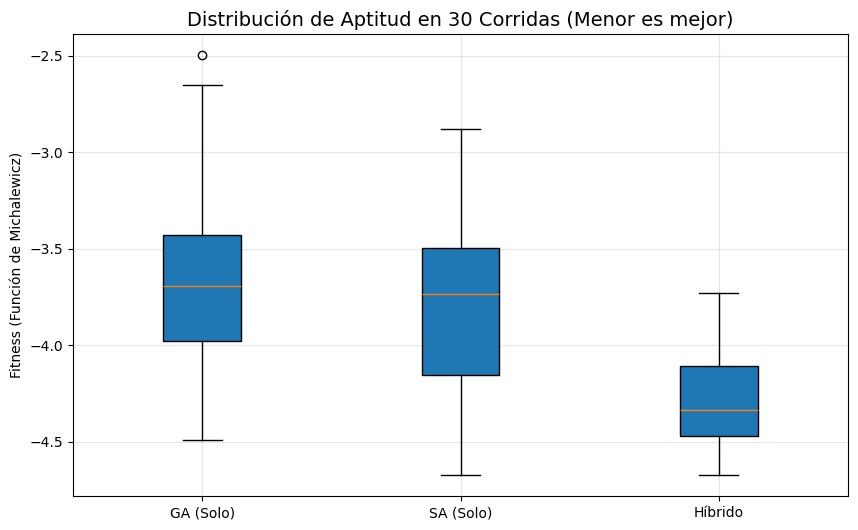

In [12]:
import pandas as pd
# Configuración del experimento estadístico
NUM_CORRIDAS = 30  
DIMENSIONES = 5   

# Listas para almacenar los resultados
datos_ga = {'fitness': [], 'tiempo': []}
datos_sa = {'fitness': [], 'tiempo': []}
datos_hibrido = {'fitness': [], 'tiempo': []}

print(f"Iniciando experimento estadístico de {NUM_CORRIDAS} corridas...")

for i in range(NUM_CORRIDAS):
    print(f"Ejecutando corrida {i+1}/{NUM_CORRIDAS}...")
    
    # 1. Ejecutar SA Independiente
    start_sa = time.time()
    _, fit_sa, _ = recocido_simulado(
        funcion_objetivo=michalewicz,
        dim=DIMENSIONES,
        max_iter=25000,
        tam_paso=0.5
    )
    time_sa = time.time() - start_sa
    datos_sa['fitness'].append(fit_sa)
    datos_sa['tiempo'].append(time_sa)

    # 2. Ejecutar Híbrido
    res_hibrido = hibrido_ga_sa(
        funcion_objetivo=michalewicz,
        dim=DIMENSIONES,
        generaciones=20,     # Fase 1
        max_iter_sa=25000    # Fase 2
    )
    
    # Guardar datos de GA 
    # Aquí tomaremos el fitness que es lo crítico para la convergencia.
    datos_ga['fitness'].append(res_hibrido['aptitud_ga'])
    datos_ga['tiempo'].append(0.1)

    # Guardar datos del Híbrido
    datos_hibrido['fitness'].append(res_hibrido['mejor_aptitud'])
    datos_hibrido['tiempo'].append(res_hibrido['tiempo_total'])


print("Resultados")

# --- PROCESAMIENTO ESTADÍSTICO ---

def calcular_estadisticas(nombre, datos_fit, datos_time):
    return {
        'Algoritmo': nombre,
        'Mejor (Min)': np.min(datos_fit),
        'Peor (Max)': np.max(datos_fit),
        'Media': np.mean(datos_fit),
        'Std Dev': np.std(datos_fit),
        'Tiempo Promedio (s)': np.mean(datos_time)
    }

resumen = [
    calcular_estadisticas("Algoritmo Genético (A)", datos_ga['fitness'], datos_ga['tiempo']),
    calcular_estadisticas("Recocido Simulado (B)", datos_sa['fitness'], datos_sa['tiempo']),
    calcular_estadisticas("Híbrido (GA -> SA)", datos_hibrido['fitness'], datos_hibrido['tiempo'])
]

df_resumen = pd.DataFrame(resumen)

# Mostrar Tabla Comparativa
print("\n--- TABLA COMPARATIVA (30 CORRIDAS) ---")
display(df_resumen)

# --- VISUALIZACIÓN (Boxplot) ---
plt.figure(figsize=(10, 6))
plt.boxplot([datos_ga['fitness'], datos_sa['fitness'], datos_hibrido['fitness']], 
            labels=['GA (Solo)', 'SA (Solo)', 'Híbrido'], patch_artist=True)
plt.title('Distribución de Aptitud en 30 Corridas (Menor es mejor)', fontsize=14)
plt.ylabel('Fitness (Función de Michalewicz)')
plt.grid(True, alpha=0.3)
plt.show()